# K-Means Clustering

**Description** - An algorithm to find the optimum number of clusters and visualizing it using 'Iris' dataset

## Importing required libraries and dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

In [2]:
# Loading dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Analysis

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# Statistical Description of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Correlation
corr_df = iris_df.corr()
corr_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Data Visualization

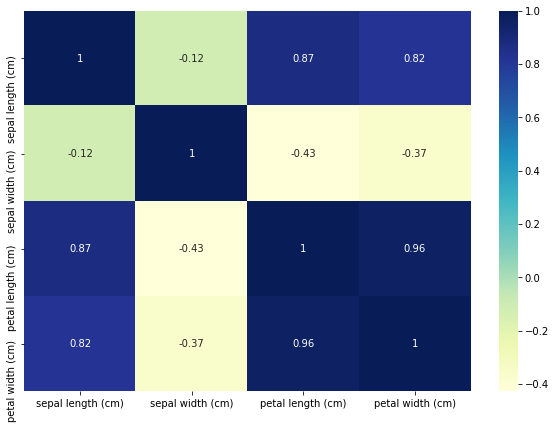

In [9]:
# Heat Map
plt.figure(figsize=[10,7])
sns.heatmap(corr_df,cmap="YlGnBu", annot=True)

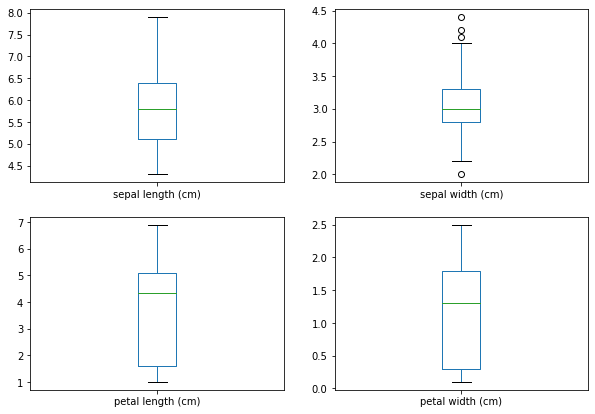

In [10]:
# Univariate: Box-Whisker plots
iris_df.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False,figsize =(10,7))
plt.show()

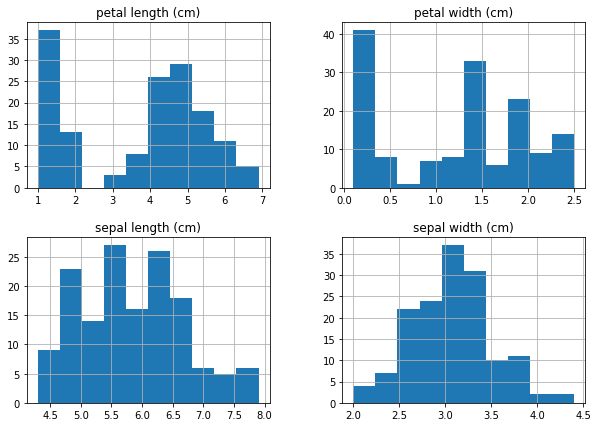

In [11]:
# Histograms
iris_df.hist(figsize =(10,7))
plt.show()

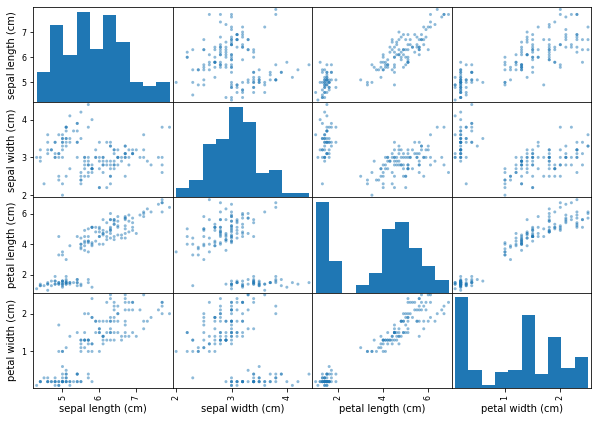

In [12]:
# Multi-variate: scatter plot matrix
scatter_matrix(iris_df,figsize = (10,7))
plt.show()

## To find optimum number of clusters

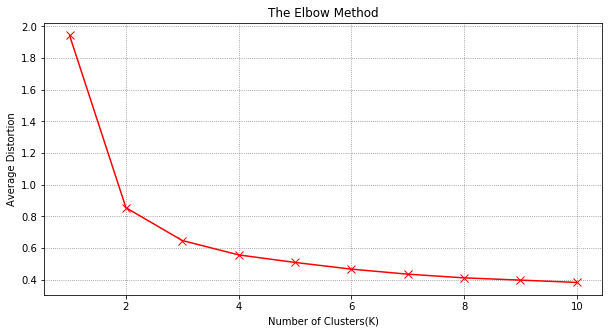

In [13]:
from scipy.spatial.distance import cdist
clusters= range(1,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_df)
    prediction=model.predict(iris_df)
    meanDistortions.append(sum(np.min(cdist(iris_df,model.cluster_centers_,'euclidean'),axis=1))/iris_df.shape[0]) 
    
plt.figure(figsize = (10,5))
plt.plot(clusters,meanDistortions,'bx-', c = 'Red', markersize = 8 ) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Average Distortion')
plt.grid(True, color = 'gray', linestyle = ':')
plt.show()

## Creating K-Mean Classifier

In [14]:
# Applying K-Means
kmeans = KMeans(n_clusters= 3, n_init=10, max_iter=300, random_state=123) 

In [15]:
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [16]:
# Centroid Value
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [17]:
kpred=kmeans.predict(iris_df)
kpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

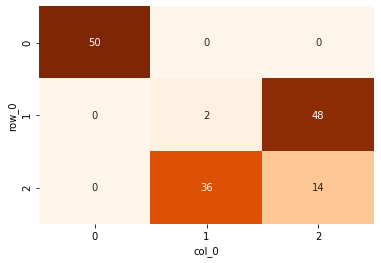

In [19]:
# Comparing
cross_tab = pd.crosstab(iris.target, kpred)
sns.heatmap(cross_tab,annot=True,cbar=False,cmap="Oranges")

In [20]:
# Labelling cluster in datset
labels = kmeans.labels_
label_clust = iris_df.assign(cluster=labels)
label_clust

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


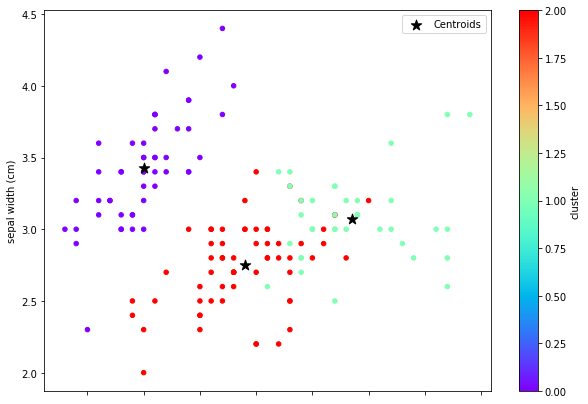

In [21]:
# Visualizing the cluster on first two columns with centroid
label_clust.plot.scatter(x = 'sepal length (cm)',y = 'sepal width (cm)', c = 'cluster', cmap = 'rainbow', figsize =(10,7))
x = kmeans.cluster_centers_[:, 0]
y = kmeans.cluster_centers_[:,1]
plt.scatter(x,y, marker = '*',s = 120, c = 'Black', label = 'Centroids')
plt.legend()